In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We see what is inside the file

In [17]:
df = pd.read_excel('./structured_data/failed/final_data_failed.xlsx')
df.head(10)

,Country:,Industry:,Started in:,Closed in:,Nº of employees:,Funding Amount:,Specific cause of failure:
0,Australia,e-Commerce,2010.0,2014,1-10,$1M,Multiple Reasons
1,Australia,Travel,2014.0,2015,1,$0,Bad Business Model
2,Australia,Entertainment,2013.0,2017,1,$100K,Lack of Funds
3,Australia,Software & Hardware,2008.0,2009,1,$0,Legal Challenges
4,Belgium,Food & Beverage,2013.0,2016,100-250,$10M,Competition
5,Belgium,Software & Hardware,2017.0,2020,1,$100K,No Market Need
6,Belgium,Software & Hardware,2016.0,2017,1,$0,No Market Need
7,Bulgaria,Entertainment,2018.0,2020,1,$100K,Bad Market Fit
8,Bulgaria,Software & Hardware,2012.0,2015,1,$100K,No Market Need
9,Bulgaria,Productivity,2013.0,2019,1,$100K,Bad Market Fit


What columns do we have

In [6]:
df.columns

Index(['Country:', 'Industry:', 'Started in:', 'Closed in:',
       'Nº of employees:', 'Funding Amount:', 'Specific cause of failure:'],
      dtype='object')

How many countries do we have in total?

In [7]:
df['Country:'].unique()

array(['Australia', 'Belgium', 'Bulgaria', 'Canada', 'Denmark', 'Germany',
       'India', 'Indonesia', 'Mexico', 'Russia', 'Spain', 'Sweden',
       'United Kingdom', 'United States'], dtype=object)

We need to see what types do we have, or do we have nulls.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country:                    214 non-null    object 
 1   Industry:                   214 non-null    object 
 2   Started in:                 213 non-null    float64
 3   Closed in:                  213 non-null    object 
 4   Nº of employees:            214 non-null    object 
 5   Funding Amount:             214 non-null    object 
 6   Specific cause of failure:  214 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.8+ KB


I need to convert started and closed years to actual year

In [9]:
df['Closed in:'] = pd.to_numeric(df['Closed in:'], errors='coerce')
df['Started in:'] = pd.to_numeric(df['Started in:'], errors='coerce')

## Observation 1. Which country has highest failed start-ups, and based on years how is the data changed.

### Let's see, which country has the highest failed startups based on our data

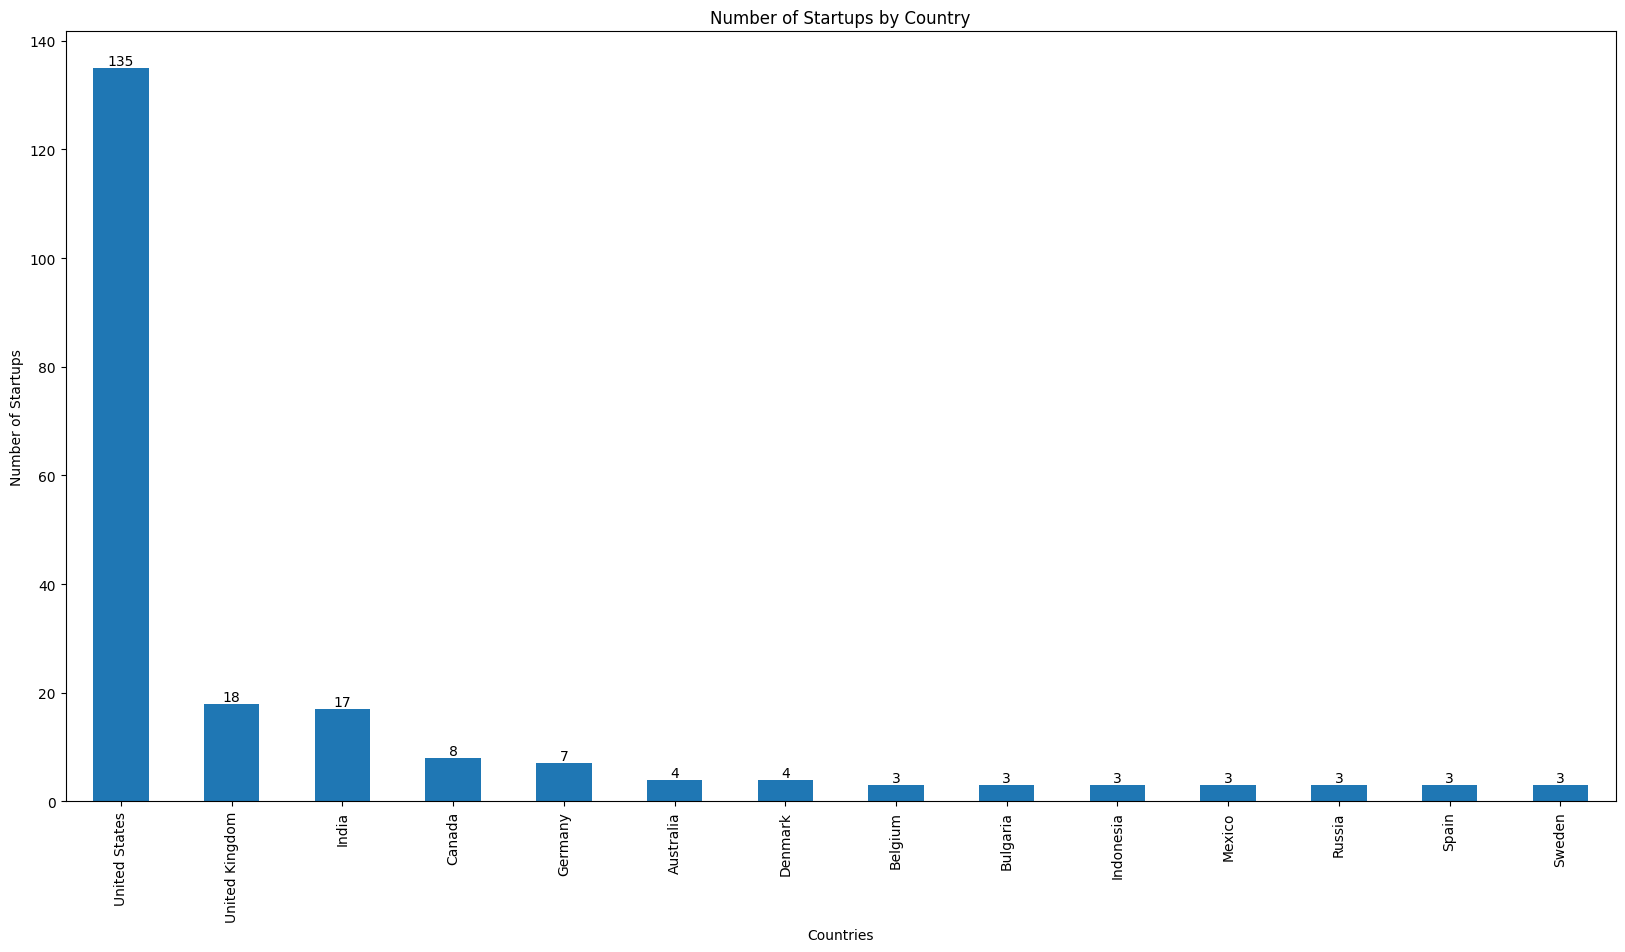

In [10]:
plt.figure(figsize=(20,10))
ax = df['Country:'].value_counts().plot(kind='bar')
country_counts = df['Country:'].value_counts()
for i, v in enumerate(country_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
ax.set(xlabel="Countries", ylabel="Number of Startups", title="Number of Startups by Country")
plt.show()

### We need to see which countries show common data based on started years.

c:\Users\PC\Desktop\pad_project\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


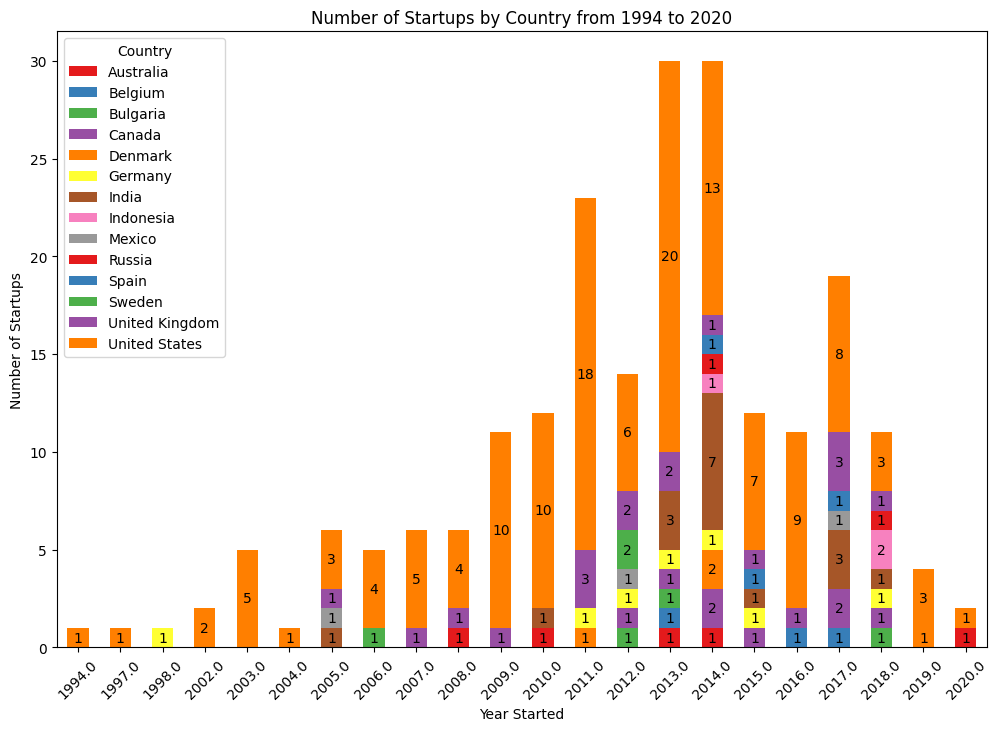

In [24]:

# Group by 'Started in' and 'Country' to count the number of startups
startups_by_country = df.groupby(['Started in:', 'Country:']).size().unstack(fill_value=0)

# Get a list of unique countries
countries = startups_by_country.columns
color_dict = dict(zip(countries, sns.color_palette('Set1', len(countries))))

# Plot the data with different colors for each country
ax = startups_by_country.plot(kind='bar', stacked=True, figsize=(12, 8), color=[color_dict[country] for country in countries])
plt.title('Number of Startups by Country from 1994 to 2020')
plt.xlabel('Year Started')
plt.ylabel('Number of Startups')
plt.legend(title='Country')
plt.xticks(rotation=45)

# Add labels inside each bar
for container in ax.containers:
    labels = [int(v) if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

plt.show()

### We need to see which countries show common data based on failed years.

<Figure size 2000x1500 with 0 Axes>

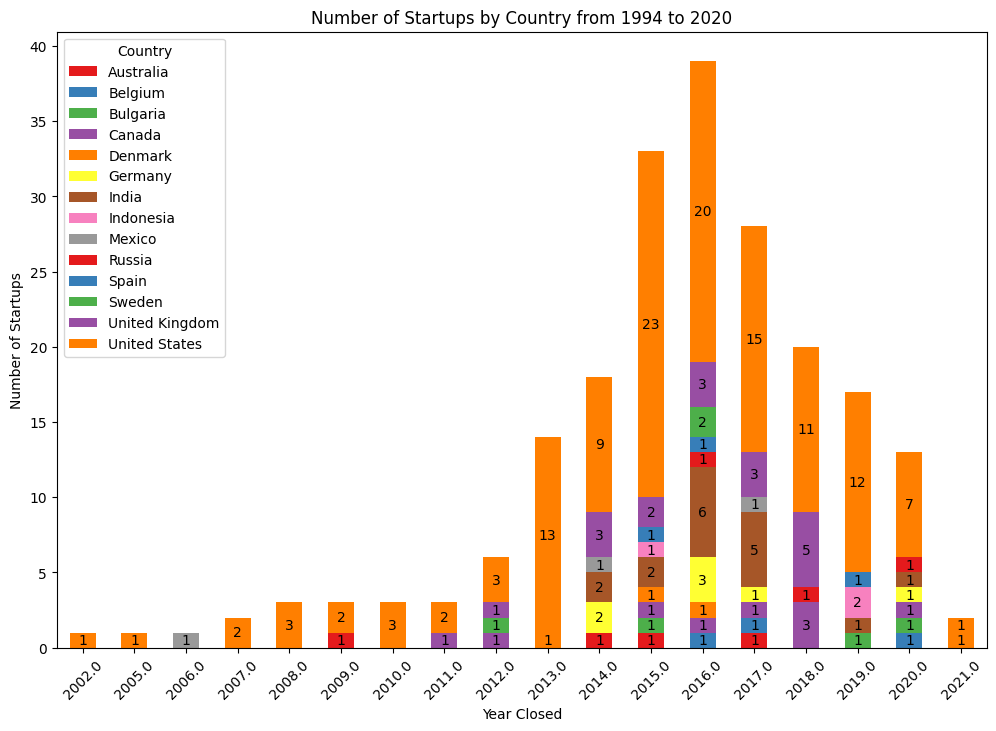

In [22]:
plt.figure(figsize=(20, 15))

# Group by 'Started in' and 'Country' to count the number of startups
startups_by_country = df.groupby(['Closed in:', 'Country:']).size().unstack(fill_value=0)

# Get a list of unique countries
countries = startups_by_country.columns
color_dict = dict(zip(countries, sns.color_palette('Set1', len(countries))))

# Plot the data with different colors for each country
ax = startups_by_country.plot(kind='bar', stacked=True, figsize=(12, 8), color=[color_dict[country] for country in countries])
plt.title('Number of Startups by Country from 1994 to 2020')
plt.xlabel('Year Closed')
plt.ylabel('Number of Startups')
plt.legend(title='Country')
plt.xticks(rotation=45)

# Add labels inside each bar
for container in ax.containers:
    labels = [int(v) if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

plt.show()

### Statistical test for Observation 1.

1. A statistical hypothesis is like a guess about a group. For example, My guess that based on started and closed in times data, the duration (living time) of most failed start-ups are in US than other countries all the time.

2. There are two types of guesses we can make:
   - Null hypothesis (H0): This is a guess that says nothing special is going on. There is no significant difference in the rate of duration of start-ups between the USA and other countries across all years.
   
   - Alternative hypothesis (H1): This is a guess that says something special is happening. Duration of failed start-ups are statistically significantly longer in the USA than in other countries across all years.

3. How do we decide which guess is right? We use something called a p-value. If the p-value is less than 0.05, it means that our data strongly suggests that the alternative hypothesis (something special is happening) is correct, so we reject the null hypothesis (nothing special is going on). If the p-value is more than 0.05, it means our data doesn't strongly suggest that something special is happening, so we don't reject the null hypothesis.

The function `scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')` is a tool we use to help us decide which guess is right when we're comparing two groups. For example, we have data on start-up failures from the USA and other countries and we want to know if the rate of start-up failures is significantly higher in the USA. 

In this case, the null hypothesis is that there is no significant difference in the rate of duration of start-up failures between the USA and other countries. If the p-value is more than 0.05, we don't have strong evidence to say that the rate of start-up failures is significantly higher in the USA, so we stick with our null hypothesis. If the p-value is less than 0.05, we have strong evidence to say that the rate of start-up failures is significantly higher in the USA, so we reject our null hypothesis and accept the alternative hypothesis.

In [58]:
from scipy.stats import ttest_ind
# Convert 'Started in' and 'Closed in' to numeric
df['Started in:'] = pd.to_numeric(df['Started in:'], errors='coerce')
df['Closed in:'] = pd.to_numeric(df['Closed in:'], errors='coerce')

# Filter only closed startups
df_closed = df[~df['Closed in:'].isnull()].copy()

# Create a new column for the duration of the startup
df_closed['Duration'] = df_closed['Closed in:'] - df_closed['Started in:']

# Separate the durations for US and non-US startups
us_durations = df_closed[df_closed['Country:'] == 'United States']['Duration'].dropna()
non_us_durations = df_closed[df_closed['Country:'] != 'United States']['Duration'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(us_durations, non_us_durations)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 2.444418046066562
P-value: 0.015353515361690198


## Which industry has reached highest funding based on countries?

    1. I will check if there is no industry name just add general.
    2. Convert Funding Amount: to actual number, change M to 000000, K to 000, remove $
    3. Make a table or map which shows the countries, each country should have industry (or industries) name and amount of funding.
    4. Do some statistical test

Select industry column, and check it has empty cells or not.

In [27]:
df['Industry:'].isnull().sum()

0

Conversion from $amount to number

In [18]:

df['Funding Amount:'] = df['Funding Amount:'].str.replace('$', '')
df['Funding Amount:'] = df['Funding Amount:'].str.replace('M', '000000')
df['Funding Amount:'] = df['Funding Amount:'].str.replace('K', '000')
df['Funding Amount:'] = pd.to_numeric(df['Funding Amount:'], errors='coerce')

df['Funding Amount:'] = df['Funding Amount:'].fillna(0)
# show all the rows of united states


### We can see For every country the funding amount by industry

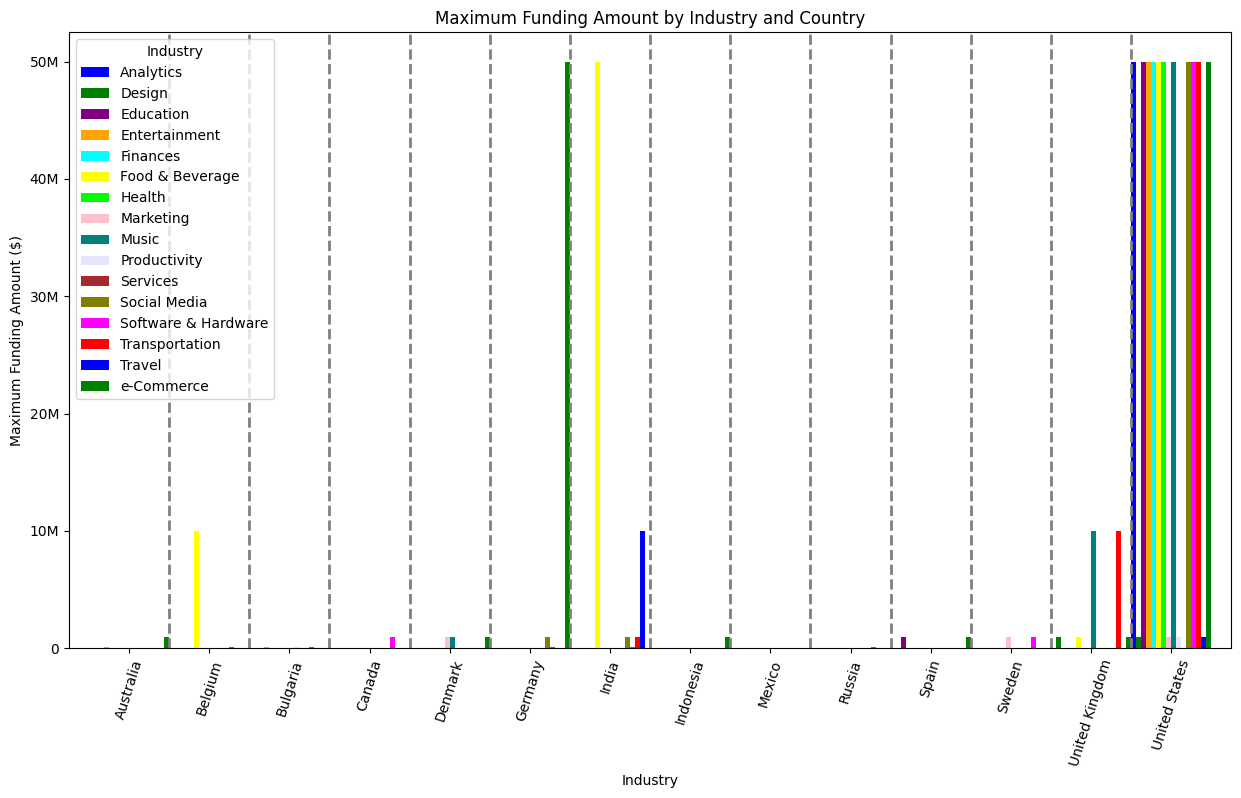

In [15]:
import matplotlib.pyplot as plt

max_funding = df.groupby(["Country:", "Industry:"])["Funding Amount:"].max().reset_index()

# Pivot table for easy plotting
pivot_table = max_funding.pivot(index="Country:", columns="Industry:", values="Funding Amount:")
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'yellow', 'lime', 'pink', 'teal', 'lavender', 'brown', 'olive', 'magenta', 'red']

# Plotting
ax = pivot_table.plot(kind="bar", figsize=(15, 8), width=1, color=colors)
plt.title("Maximum Funding Amount by Industry and Country")
plt.xlabel("Industry")
plt.ylabel("Maximum Funding Amount ($)")
plt.xticks(rotation=72.5)
plt.legend(title="Industry")

def format_y_tick_labels(tick_val, tick_pos):
    if tick_val >= 1000000:
        val = int(tick_val / 1000000)
        return f"{val}M"
    else:
        return int(tick_val)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_y_tick_labels))

# Add vertical lines to mark the beginning and end of each country
for i in range(len(pivot_table.index) - 1):
    ax.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=2)

plt.show()


### 1. Guess: Based on data, can we say e-Commerce is the Industry where in most countries it can reach from a million dollar to 50 million dollar, even it fails.

### 2. Null Hypothesis (H0):
#### e-Commerce is not the industry where, in most countries, businesses can reach revenue figures between one million dollars to fifty million dollars even if they fail.

### 3. Alternative Hypothesis (H1):
#### e-Commerce is the industry where, in most countries, businesses can reach revenue figures between one million dollars to fifty million dollars even if they fail.

#### If the p-value > 0.05, we stick with our null hypothesis. If the p-value < 0.05,  we accept the alternative hypothesis.

*** We need to check that our data is normally distributed or not in terms of funding by industry. Than we can make desicion which test we can perform. ***

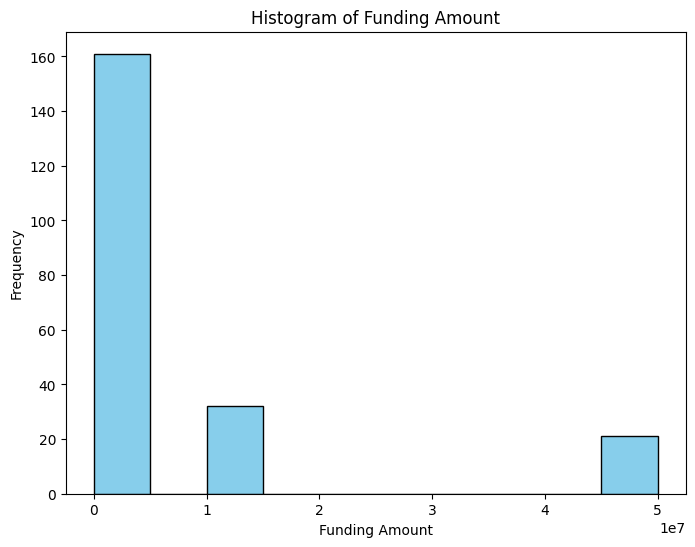

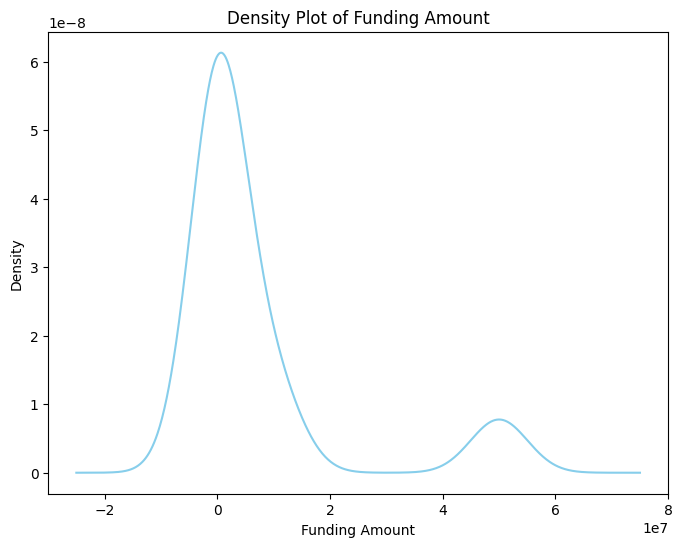

Shapiro-Wilk Test p-value: 1.0891677056711648e-24
Sample does not look normally distributed (reject H0)


In [26]:
from scipy.stats import shapiro
# Step 3: Extract the Numeric Variable
funding_amount = df['Funding Amount:']
# Step 4: Visual Inspection
plt.figure(figsize=(8, 6))
plt.hist(funding_amount, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Funding Amount')
plt.xlabel('Funding Amount')
plt.ylabel('Frequency')
plt.show()

# Density plot
plt.figure(figsize=(8, 6))
funding_amount.plot(kind='density', color='skyblue')
plt.title('Density Plot of Funding Amount')
plt.xlabel('Funding Amount')
plt.ylabel('Density')
plt.show()

# Step 5: Statistical Tests
# Shapiro-Wilk test for normality
stat, p = shapiro(funding_amount)
alpha = 0.05
print("Shapiro-Wilk Test p-value:", p)
if p > alpha:
    print("Sample looks normally distributed (fail to reject H0)")
else:
    print("Sample does not look normally distributed (reject H0)")


#### For comparing a categorical variable (industry) with a range of values for a continuous variable (funding amount), I can use a non-parametric test like the Kruskal-Wallis test. It is suitable for comparing the distributions of continuous variables across different groups (in this case, industries).

In [28]:
from scipy.stats import kruskal

# Step 1: Subset the data for e-Commerce industry
ecommerce_data = df[df['Industry:'] == 'e-Commerce']

# Step 2: Define the revenue range
min_revenue = 1000000
max_revenue = 50000000

# Step 3: Perform Kruskal-Wallis Test
revenue_range_data = df[(df['Funding Amount:'] >= min_revenue) & (df['Funding Amount:'] <= max_revenue)]
stat, p_value = kruskal(ecommerce_data['Funding Amount:'], revenue_range_data['Funding Amount:'])

alpha = 0.05

if p_value > alpha:
    print("p-value:", p_value)
    print("We fail to reject the null hypothesis.")
    print("There is no significant difference in funding amounts between e-Commerce industry and the specified revenue range.")
else:
    print("p-value:", p_value)
    print("We reject the null hypothesis.")
    print("There is a significant difference in funding amounts between e-Commerce industry and the specified revenue range.")


p-value: 0.0010729897497881798
We reject the null hypothesis.
There is a significant difference in funding amounts between e-Commerce industry and the specified revenue range.
